In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models

# b. Load the training & testing data

train_path = "dataset/CIFR(Ass2&3)/train_data.csv"
test_path  = "dataset/CIFR(Ass2&3)/test_data.csv"

train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)

# label is LAST column
y_train = train_df.iloc[:, -1].values
x_train = train_df.iloc[:, :-1].values

y_test = test_df.iloc[:, -1].values
x_test = test_df.iloc[:, :-1].values

# Normalize pixels
x_train = x_train.astype("float32") / 255.0
x_test  = x_test.astype("float32") / 255.0

# CIFAR shape
x_train = x_train.reshape(-1, 32, 32, 3)
x_test = x_test.reshape(-1, 32, 32, 3)

print("Train shape:", x_train.shape)
print("Test shape:", x_test.shape)


Train shape: (50000, 32, 32, 3)
Test shape: (10000, 32, 32, 3)


In [2]:
# b. Defining the CNN Architecture
model = models.Sequential([
    layers.Input(shape=(32, 32, 3)), 

    layers.Conv2D(32, (3,3), activation='relu', padding="same"),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(64, (3,3), activation='relu', padding="same"),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(128, (3,3), activation='relu', padding="same"),
    layers.MaxPooling2D(2,2),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax'),
])

model.summary()

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 356,810 (1.36 MB)

 Trainable params: 356,810 (1.36 MB)

 Non-trainable params: 0 (0.00 B)

In [3]:
# c. Training the Model

history = model.fit(
    x_train, y_train,
    batch_size=64,
    epochs=20,
    validation_split=0.1,
    verbose=1
)


Epoch 1/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 12s 15ms/step - accuracy: 0.4484 - loss: 1.5146 - val_accuracy: 0.5512 - val_loss: 1.2686
Epoch 2/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 11s 15ms/step - accuracy: 0.6172 - loss: 1.0780 - val_accuracy: 0.6406 - val_loss: 1.0388
Epoch 3/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - accuracy: 0.6840 - loss: 0.9012 - val_accuracy: 0.6786 - val_loss: 0.9204
Epoch 4/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - accuracy: 0.7264 - loss: 0.7839 - val_accuracy: 0.7088 - val_loss: 0.8468
Epoch 5/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - accuracy: 0.7603 - loss: 0.6923 - val_accuracy: 0.7272 - val_loss: 0.8251
Epoch 6/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - accuracy: 0.7831 - loss: 0.6157 - val_accuracy: 0.7192 - val_loss: 0.8490
Epoch 7/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 20s 14ms/step - accuracy: 0.8083 - loss: 0.5477 - val_accuracy: 0.7316 - val_loss: 0.8416
Epoch 8/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - accuracy: 0.8287 - loss: 0.4841 - 

In [5]:
# d. Estimating Model Performance

test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)

print("\nTest Accuracy:", test_acc)
print("Test Loss:", test_loss)


313/313 - 1s - 3ms/step - accuracy: 0.7270 - loss: 1.6449

Test Accuracy: 0.7269999980926514
Test Loss: 1.644901156425476


In [6]:
unique_classes = np.unique(y_train)
print("Unique class IDs:", unique_classes)
print("Total classes:", len(unique_classes))

Unique class IDs: [0 1 2 3 4 5 6 7 8 9]
Total classes: 10


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Actual: airplane
Predicted: airplane


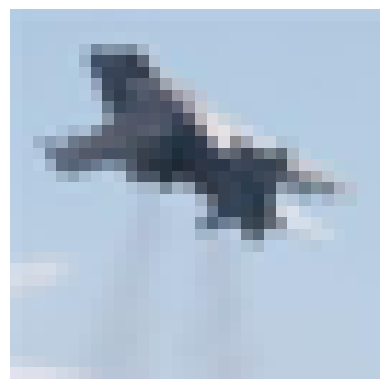

In [12]:
import matplotlib.pyplot as plt

# Pick a random image

class_names = [
    "airplane",
    "automobile",
    "bird",
    "cat",
    "deer",
    "dog",
    "frog",
    "horse",
    "ship",
    "truck"
]

i = np.random.randint(0, len(x_test))

img = x_test[i]

pred = model.predict(img.reshape(1, 32, 32, 3))
pred_class = np.argmax(pred)

print("Actual:", class_names[y_test[i]])
print("Predicted:", class_names[pred_class])

plt.imshow(img)
plt.axis("off")
plt.show()


Found 7357 images belonging to 102 classes.
Found 1788 images belonging to 102 classes.
Total Classes: 102


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)    │ (None, 160, 160, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Conv1 (Conv2D)                │ (None, 80, 80, 32)        │             864 │ input_layer_3[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ bn_Conv1 (BatchNormalization) │ (None, 80, 80, 32)        │             128 │ Conv1[0][0]                │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Conv1_relu (ReLU)             │ (None, 80, 80, 32)        │               0 │ bn_Conv1[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise       │ (None, 80, 80, 32)        │             288 │ Conv1_relu[0][0]           │
│ (DepthwiseConv2D)             │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise_BN    │ (None, 80, 80, 32)        │             128 │ expanded_conv_depthwise[0… │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise_relu  │ (None, 80, 80, 32)        │               0 │ expanded_conv_depthwise_B… │
│ (ReLU)                        │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_project         │ (None, 80, 80, 16)        │             512 │ expanded_conv_depthwise_r… │
│ (Conv2D)                      │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_project_BN      │ (None, 80, 80, 16)        │              64 │ expanded_conv_project[0][… │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand (Conv2D)       │ (None, 80, 80, 96)        │           1,536 │ expanded_conv_project_BN[… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand_BN             │ (None, 80, 80, 96)        │             384 │ block_1_expand[0][0]       │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand_relu (ReLU)    │ (None, 80, 80, 96)        │               0 │ block_1_expand_BN[0][0]    │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_pad (ZeroPadding2D)   │ (None, 81, 81, 96)        │               0 │ block_1_expand_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_depthwise             │ (None, 40, 40, 96)        │             864 │ block_1_pad[0][0]          │
│ (DepthwiseConv2D)             │                           │               

 Total params: 2,388,646 (9.11 MB)

 Trainable params: 130,662 (510.40 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

Epoch 1/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 33s 134ms/step - accuracy: 0.6923 - loss: 1.3987 - val_accuracy: 0.8619 - val_loss: 0.4990
Epoch 2/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 30s 130ms/step - accuracy: 0.9228 - loss: 0.2952 - val_accuracy: 0.8826 - val_loss: 0.4038
Epoch 3/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 30s 129ms/step - accuracy: 0.9570 - loss: 0.1632 - val_accuracy: 0.8965 - val_loss: 0.3564
Epoch 4/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 30s 130ms/step - accuracy: 0.9776 - loss: 0.1046 - val_accuracy: 0.8993 - val_loss: 0.3453
Epoch 5/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 30s 130ms/step - accuracy: 0.9863 - loss: 0.0713 - val_accuracy: 0.9072 - val_loss: 0.3354
Epoch 6/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 30s 131ms/step - accuracy: 0.9897 - loss: 0.0535 - val_accuracy: 0.9100 - val_loss: 0.3192
Epoch 7/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 30s 131ms/step - accuracy: 0.9943 - loss: 0.0403 - val_accuracy: 0.9060 - val_loss: 0.3183
Epoch 8/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 30s 131ms/step - accuracy: 0.9957 - loss: 0

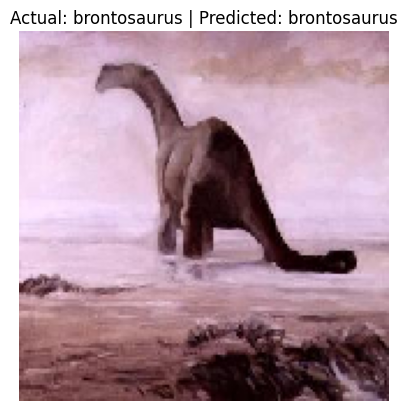

In [15]:
# ================================================================
# IMAGE CLASSIFICATION USING TRANSFER LEARNING (MobileNetV2)
# Dataset: Caltech-101
# Stages: (a) Loading & Preprocessing
#         (b) Model Architecture
#         (c) Training
#         (d) Performance Evaluation
# ================================================================

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
import numpy as np
import matplotlib.pyplot as plt

# ================================================================
# (a) LOADING AND PREPROCESSING THE IMAGE DATA
# ================================================================

DATASET_DIR = r"D:/Practicle/DL/dataset/Object Detection(Ass6)/caltech-101-img"
IMG_SIZE = (160, 160)
BATCH_SIZE = 32

# Data normalization + validation split
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_data = datagen.flow_from_directory(
    DATASET_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

val_data = datagen.flow_from_directory(
    DATASET_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)

num_classes = train_data.num_classes
print("Total Classes:", num_classes)


# ================================================================
# (b) DEFINING THE MODEL ARCHITECTURE — MobileNetV2 Transfer Learning
# ================================================================

base_model = MobileNetV2(
    weights='imagenet',
    include_top=False,
    input_shape=(160, 160, 3)
)

# Freeze convolution layers
for layer in base_model.layers:
    layer.trainable = False

# Add classification head
x = GlobalAveragePooling2D()(base_model.output)
x = Dropout(0.3)(x)
output = Dense(num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=output)

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()


# ================================================================
# (c) TRAINING THE MODEL
# ================================================================

history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=10,       # recommended: 10–15 for good accuracy
    verbose=1
)


# ================================================================
# (d) ESTIMATING MODEL'S PERFORMANCE
# ================================================================

val_loss, val_acc = model.evaluate(val_data)
print("Validation Accuracy:", val_acc)
print("Validation Loss:", val_loss)


# ================================================================
# EXTRA: TESTING PREDICTION ON A RANDOM VALIDATION IMAGE
# ================================================================

img_batch, label_batch = next(val_data)
idx = np.random.randint(0, len(img_batch))

img = img_batch[idx]
true_class = np.argmax(label_batch[idx])

pred = model.predict(img.reshape(1, 160, 160, 3))
pred_class = np.argmax(pred)

class_names = list(train_data.class_indices.keys())

print("Actual Class:", class_names[true_class])
print("Predicted Class:", class_names[pred_class])

plt.imshow(img)
plt.title(f"Actual: {class_names[true_class]} | Predicted: {class_names[pred_class]}")
plt.axis("off")
plt.show()
